In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2017-01-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2017_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-01-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6680    ÎèôÎûòÍµ¨   8175    ÎèôÎûòÍµ¨   
1   2017-01-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6250    ÎèôÎûòÍµ¨   6260    ÎèôÎûòÍµ¨   
2   2017-01-05    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3500    ÎèôÎûòÍµ¨   4000    ÎèôÎûòÍµ¨   
3   2017-01-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   4200    ÎèôÎûòÍµ¨   4500    ÎèôÎûòÍµ¨   
4   2017-01-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4000    ÎèôÎûòÍµ¨   4285    ÎèôÎûòÍµ¨   
5   2017-01-05     ÎåÄÌåå                      1.0„éè   3685    ÎèôÎûòÍµ¨   4000    ÎèôÎûòÍµ¨   
6   2017-01-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   5900    ÎèôÎûòÍµ¨   9800    ÎèôÎûòÍµ¨   
7   2017-01-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3849    ÎèôÎûòÍµ¨   4365    ÎèôÎûòÍµ¨   
8   2017-01-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    650    ÎèôÎûòÍµ¨    676    ÎèôÎûòÍµ¨   
9   2017-01-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1330    ÎèôÎûòÍµ¨   2000    ÎèôÎûòÍµ¨   
10  2017-01-05      Î¨¥                   2.0„éè 1Í∞ú   2500    ÎèôÎûòÍµ¨   2519    ÎèôÎûòÍµ¨   
11  2017-01-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3400    ÎèôÎûòÍµ¨   3430    ÎèôÎûòÍµ¨   
12  2017-01-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2900    ÎèôÎûòÍµ¨   3000    ÎèôÎûòÍµ¨   
13  2017-01-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  26000    ÎèôÎûòÍµ¨  37578    ÎèôÎûòÍµ¨   
14  2017-01-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3500    ÎèôÎûòÍµ¨   3824    ÎèôÎûòÍµ¨   
15  2017-01-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4300    ÎèôÎûòÍµ¨   5720    ÎèôÎûòÍµ¨   
16  2017-01-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850    ÎèôÎûòÍµ¨  14500    ÎèôÎûòÍµ¨   
17  2017-01-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13799    ÎèôÎûòÍµ¨  19777    ÎèôÎûòÍµ¨   
18  2017-01-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450    ÎèôÎûòÍµ¨   2450    ÎèôÎûòÍµ¨   
19  2017-01-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1620    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
20  2017-01-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1130    ÎèôÎûòÍµ¨   1130    ÎèôÎûòÍµ¨   
21  2017-01-05    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  42500    ÎèôÎûòÍµ¨  49000    ÎèôÎûòÍµ¨   
22  2017-01-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4200    ÎèôÎûòÍµ¨   6950    ÎèôÎûòÍµ¨   
23  2017-01-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  29900    ÎèôÎûòÍµ¨  32600    ÎèôÎûòÍµ¨   
24  2017-01-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2000    ÎèôÎûòÍµ¨   2440    ÎèôÎûòÍµ¨   
25  2017-01-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÎèôÎûòÍµ¨    730    ÎèôÎûòÍµ¨   
26  2017-01-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÎèôÎûòÍµ¨   7250    ÎèôÎûòÍµ¨   
27  2017-01-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2550    ÎèôÎûòÍµ¨   
28  2017-01-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2280    ÎèôÎûòÍµ¨   2862    ÎèôÎûòÍµ¨   
29  2017-01-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11980    ÎèôÎûòÍµ¨  18386    ÎèôÎûòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1495  22.38%   7,428  
1      10   0.16%   6,255  
2     500  14.29%   3,750  
3     300   7.14%   4,350  
4     285   7.12%   4,143  
5     315   8.55%   3,843  
6    3900   66.1%   7,850  
7     516  13.41%   4,107  
8      26    4.0%     663  
9     670  50.38%   1,665  
10     19   0.76%   2,510  
11     30   0.88%   3,415  
12    100   3.45%   2,950  
13  11578  44.53%  31,789  
14    324   9.26%   3,662  
15   1420  33.02%   5,010  
16    650   4.69%  14,175  
17   5978  43.32%  16,788  
18      0    0.0%   2,450  
19    170  10.49%   1,705  
20      0    0.0%   1,130  
21   6500  15.2

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2017-04-06"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2017_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-04-06   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6250    ÎèôÎûòÍµ¨   7430    ÎèôÎûòÍµ¨   
1   2017-04-06     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6230    ÎèôÎûòÍµ¨   6250    ÎèôÎûòÍµ¨   
2   2017-04-06    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5500    ÎèôÎûòÍµ¨   6285    ÎèôÎûòÍµ¨   
3   2017-04-06     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3200    ÎèôÎûòÍµ¨   3900    ÎèôÎûòÍµ¨   
4   2017-04-06    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5238    ÎèôÎûòÍµ¨   7380    ÎèôÎûòÍµ¨   
5   2017-04-06     ÎåÄÌåå                      1.0„éè   3000    ÎèôÎûòÍµ¨   5000    ÎèôÎûòÍµ¨   
6   2017-04-06   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   6700    ÎèôÎûòÍµ¨  10900    ÎèôÎûòÍµ¨   
7   2017-04-06     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3820    ÎèôÎûòÍµ¨   4365    ÎèôÎûòÍµ¨   
8   2017-04-06     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    680    ÎèôÎûòÍµ¨   
9   2017-04-06     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1420    ÎèôÎûòÍµ¨   
10  2017-04-06      Î¨¥                   2.0„éè 1Í∞ú   1800    ÎèôÎûòÍµ¨   2351    ÎèôÎûòÍµ¨   
11  2017-04-06    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3100    ÎèôÎûòÍµ¨   3430    ÎèôÎûòÍµ¨   
12  2017-04-06     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6800    ÎèôÎûòÍµ¨  12375    ÎèôÎûòÍµ¨   
13  2017-04-06      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  22600    ÎèôÎûòÍµ¨  37578    ÎèôÎûòÍµ¨   
14  2017-04-06     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3000    ÎèôÎûòÍµ¨   3488    ÎèôÎûòÍµ¨   
15  2017-04-06  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3900    ÎèôÎûòÍµ¨   6800    ÎèôÎûòÍµ¨   
16  2017-04-06   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850    ÎèôÎûòÍµ¨  14500    ÎèôÎûòÍµ¨   
17  2017-04-06     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  20000    ÎèôÎûòÍµ¨  20856    ÎèôÎûòÍµ¨   
18  2017-04-06    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2320    ÎèôÎûòÍµ¨   2630    ÎèôÎûòÍµ¨   
19  2017-04-06     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1650    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
20  2017-04-06     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1200    ÎèôÎûòÍµ¨   1200    ÎèôÎûòÍµ¨   
21  2017-04-06    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  41100    ÎèôÎûòÍµ¨  49000    ÎèôÎûòÍµ¨   
22  2017-04-06    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4900    ÎèôÎûòÍµ¨   6950    ÎèôÎûòÍµ¨   
23  2017-04-06      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  36000    ÎèôÎûòÍµ¨  39000    ÎèôÎûòÍµ¨   
24  2017-04-06     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2601    ÎèôÎûòÍµ¨   3100    ÎèôÎûòÍµ¨   
25  2017-04-06     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÎèôÎûòÍµ¨    730    ÎèôÎûòÍµ¨   
26  2017-04-06    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÎèôÎûòÍµ¨   7250    ÎèôÎûòÍµ¨   
27  2017-04-06   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
28  2017-04-06     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2952    ÎèôÎûòÍµ¨   2980    ÎèôÎûòÍµ¨   
29  2017-04-06    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15780    ÎèôÎûòÍµ¨  16706    ÎèôÎûòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1180  18.88%   6,840  
1      20   0.32%   6,240  
2     785  14.27%   5,893  
3     700  21.88%   3,550  
4    2142  40.89%   6,309  
5    2000  66.67%   4,000  
6    4200  62.69%   8,800  
7     545  14.27%   4,093  
8       4   0.59%     678  
9      10   0.71%   1,415  
10    551  30.61%   2,076  
11    330  10.65%   3,265  
12   5575  81.99%   9,588  
13  14978  66.27%  30,089  
14    488  16.27%   3,244  
15   2900  74.36%   5,350  
16    650   4.69%  14,175  
17    856   4.28%  20,428  
18    310  13.36%   2,475  
19    140   8.48%   1,720  
20      0    0.0%   1,200  
21   7900  19.2

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2017-07-06"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2017_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-07-06   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7430    ÎèôÎûòÍµ¨   9375    ÎèôÎûòÍµ¨   
1   2017-07-06     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6230    ÎèôÎûòÍµ¨   6350    ÎèôÎûòÍµ¨   
2   2017-07-06    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3725    ÎèôÎûòÍµ¨   5000    ÎèôÎûòÍµ¨   
3   2017-07-06     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3980    ÎèôÎûòÍµ¨   4000    ÎèôÎûòÍµ¨   
4   2017-07-06    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5300    ÎèôÎûòÍµ¨   6100    ÎèôÎûòÍµ¨   
5   2017-07-06     ÎåÄÌåå                      1.0„éè   2857    ÎèôÎûòÍµ¨   3100    ÎèôÎûòÍµ¨   
6   2017-07-06   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8900    ÎèôÎûòÍµ¨  11920    ÎèôÎûòÍµ¨   
7   2017-07-06     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3820    ÎèôÎûòÍµ¨   4365    ÎèôÎûòÍµ¨   
8   2017-07-06     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    680    ÎèôÎûòÍµ¨   
9   2017-07-06     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1420    ÎèôÎûòÍµ¨   
10  2017-07-06      Î¨¥                   2.0„éè 1Í∞ú   2000    ÎèôÎûòÍµ¨   2209    ÎèôÎûòÍµ¨   
11  2017-07-06    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÎèôÎûòÍµ¨   4850    ÎèôÎûòÍµ¨   
12  2017-07-06     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9210    ÎèôÎûòÍµ¨  10900    ÎèôÎûòÍµ¨   
13  2017-07-06      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  22600    ÎèôÎûòÍµ¨  43894    ÎèôÎûòÍµ¨   
14  2017-07-06     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2541    ÎèôÎûòÍµ¨   2830    ÎèôÎûòÍµ¨   
15  2017-07-06  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3900    ÎèôÎûòÍµ¨   9478    ÎèôÎûòÍµ¨   
16  2017-07-06   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  11500    ÎèôÎûòÍµ¨  14500    ÎèôÎûòÍµ¨   
17  2017-07-06     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  19000    ÎèôÎûòÍµ¨  20856    ÎèôÎûòÍµ¨   
18  2017-07-06    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2191    ÎèôÎûòÍµ¨   2320    ÎèôÎûòÍµ¨   
19  2017-07-06     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
20  2017-07-06     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1200    ÎèôÎûòÍµ¨   1200    ÎèôÎûòÍµ¨   
21  2017-07-06    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39800    ÎèôÎûòÍµ¨  49000    ÎèôÎûòÍµ¨   
22  2017-07-06    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5000    ÎèôÎûòÍµ¨   6950    ÎèôÎûòÍµ¨   
23  2017-07-06      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  36000    ÎèôÎûòÍµ¨  37000    ÎèôÎûòÍµ¨   
24  2017-07-06     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2000    ÎèôÎûòÍµ¨   2681    ÎèôÎûòÍµ¨   
25  2017-07-06     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÎèôÎûòÍµ¨    730    ÎèôÎûòÍµ¨   
26  2017-07-06    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÎèôÎûòÍµ¨   7250    ÎèôÎûòÍµ¨   
27  2017-07-06   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
28  2017-07-06     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980    ÎèôÎûòÍµ¨   2980    ÎèôÎûòÍµ¨   
29  2017-07-06    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15399    ÎèôÎûòÍµ¨  15790    ÎèôÎûòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1945   26.18%   8,403  
1     120    1.93%   6,290  
2    1275   34.23%   4,363  
3      20     0.5%   3,990  
4     800   15.09%   5,700  
5     243    8.51%   2,979  
6    3020   33.93%  10,410  
7     545   14.27%   4,093  
8       4    0.59%     678  
9      10    0.71%   1,415  
10    209   10.45%   2,105  
11   1420    41.4%   4,140  
12   1690   18.35%  10,055  
13  21294   94.22%  33,247  
14    289   11.37%   2,686  
15   5578  143.03%   6,689  
16   3000   26.09%  13,000  
17   1856    9.77%  19,928  
18    129    5.89%   2,256  
19    160    9.82%   1,710  
20      0     0.0%   1

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2017-10-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2017_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-10-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   9350    ÎèôÎûòÍµ¨   9375    ÎèôÎûòÍµ¨   
1   2017-10-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6230    ÎèôÎûòÍµ¨   6250    ÎèôÎûòÍµ¨   
2   2017-10-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3125    ÎèôÎûòÍµ¨   4500    ÎèôÎûòÍµ¨   
3   2017-10-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3000    ÎèôÎûòÍµ¨   3000    ÎèôÎûòÍµ¨   
4   2017-10-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5238    ÎèôÎûòÍµ¨   5250    ÎèôÎûòÍµ¨   
5   2017-10-12     ÎåÄÌåå                      1.0„éè   4257    ÎèôÎûòÍµ¨   4500    ÎèôÎûòÍµ¨   
6   2017-10-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8400    ÎèôÎûòÍµ¨  11300    ÎèôÎûòÍµ¨   
7   2017-10-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   2800    ÎèôÎûòÍµ¨   4365    ÎèôÎûòÍµ¨   
8   2017-10-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    680    ÎèôÎûòÍµ¨   
9   2017-10-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1420    ÎèôÎûòÍµ¨   
10  2017-10-12      Î¨¥                   2.0„éè 1Í∞ú   1680    ÎèôÎûòÍµ¨   2400    ÎèôÎûòÍµ¨   
11  2017-10-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÎèôÎûòÍµ¨   4850    ÎèôÎûòÍµ¨   
12  2017-10-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3900    ÎèôÎûòÍµ¨   5620    ÎèôÎûòÍµ¨   
13  2017-10-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  29000    ÎèôÎûòÍµ¨  31200    ÎèôÎûòÍµ¨   
14  2017-10-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3796    ÎèôÎûòÍµ¨   4400    ÎèôÎûòÍµ¨   
15  2017-10-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3900    ÎèôÎûòÍµ¨   4900    ÎèôÎûòÍµ¨   
16  2017-10-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  12000    ÎèôÎûòÍµ¨  14500    ÎèôÎûòÍµ¨   
17  2017-10-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15000    ÎèôÎûòÍµ¨  15107    ÎèôÎûòÍµ¨   
18  2017-10-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2191    ÎèôÎûòÍµ¨   2320    ÎèôÎûòÍµ¨   
19  2017-10-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
20  2017-10-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1200    ÎèôÎûòÍµ¨   1200    ÎèôÎûòÍµ¨   
21  2017-10-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  42300    ÎèôÎûòÍµ¨  49000    ÎèôÎûòÍµ¨   
22  2017-10-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5300    ÎèôÎûòÍµ¨   7506    ÎèôÎûòÍµ¨   
23  2017-10-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  36000    ÎèôÎûòÍµ¨  44900    ÎèôÎûòÍµ¨   
24  2017-10-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2000    ÎèôÎûòÍµ¨   2681    ÎèôÎûòÍµ¨   
25  2017-10-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÎèôÎûòÍµ¨    730    ÎèôÎûòÍµ¨   
26  2017-10-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÎèôÎûòÍµ¨   7250    ÎèôÎûòÍµ¨   
27  2017-10-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2520    ÎèôÎûòÍµ¨   
28  2017-10-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980    ÎèôÎûòÍµ¨   4824    ÎèôÎûòÍµ¨   
29  2017-10-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15773    ÎèôÎûòÍµ¨  15790    ÎèôÎûòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     25   0.27%   9,363  
1     20   0.32%   6,240  
2   1375   44.0%   3,813  
3      0    0.0%   3,000  
4     12   0.23%   5,244  
5    243   5.71%   4,379  
6   2900  34.52%   9,850  
7   1565  55.89%   3,583  
8      4   0.59%     678  
9     10   0.71%   1,415  
10   720  42.86%   2,040  
11  1420   41.4%   4,140  
12  1720   44.1%   4,760  
13  2200   7.59%  30,100  
14   604  15.91%   4,098  
15  1000  25.64%   4,400  
16  2500  20.83%  13,250  
17   107   0.71%  15,054  
18   129   5.89%   2,256  
19   160   9.82%   1,710  
20     0    0.0%   1,200  
21  6700  15.84%  45,650  
22  2206  

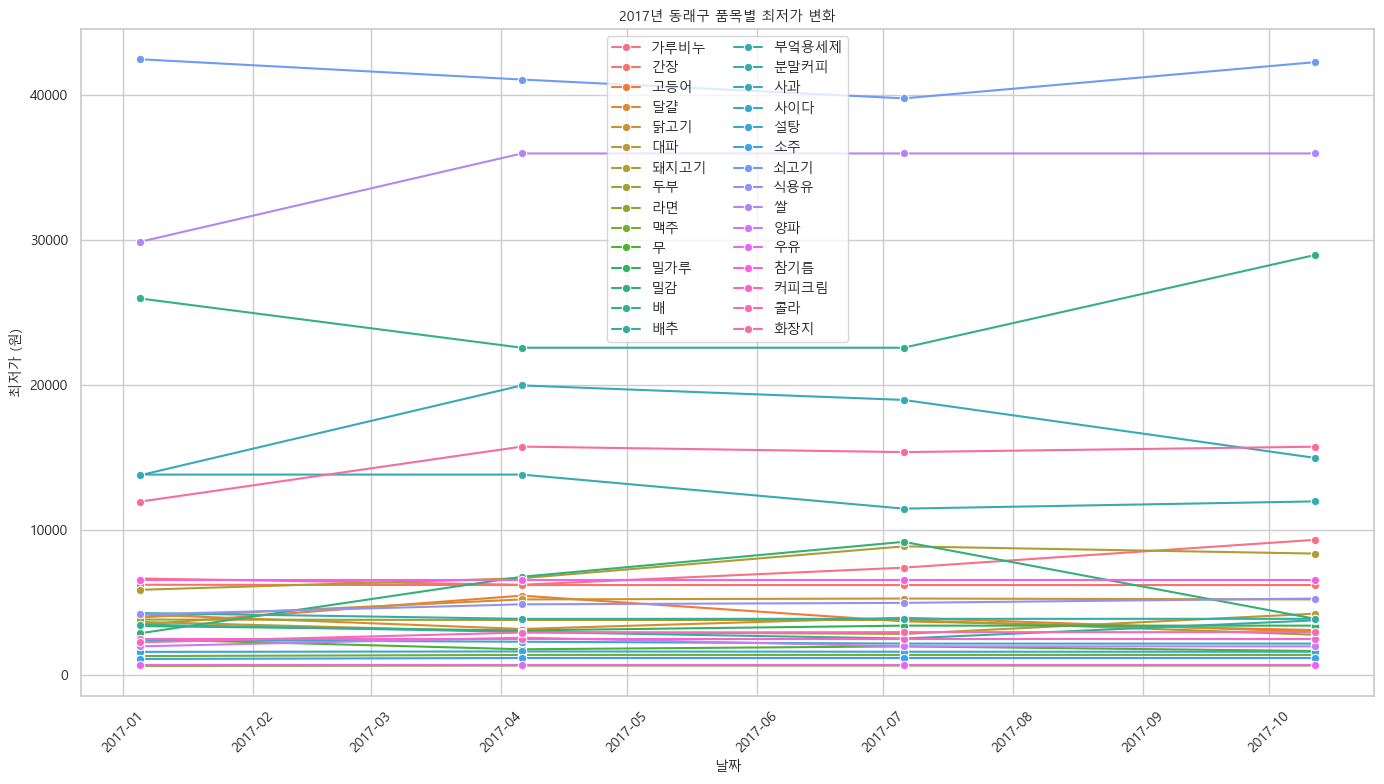

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎèôÎûòÍµ¨2017_1q.csv")
q2 = pd.read_csv("ÎèôÎûòÍµ¨2017_2q.csv")
q3 = pd.read_csv("ÎèôÎûòÍµ¨2017_3q.csv")
q4 = pd.read_csv("ÎèôÎûòÍµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ ÎèôÎûòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎèôÎûòÍµ¨2017_min.csv", index=False, encoding="utf-8-sig")

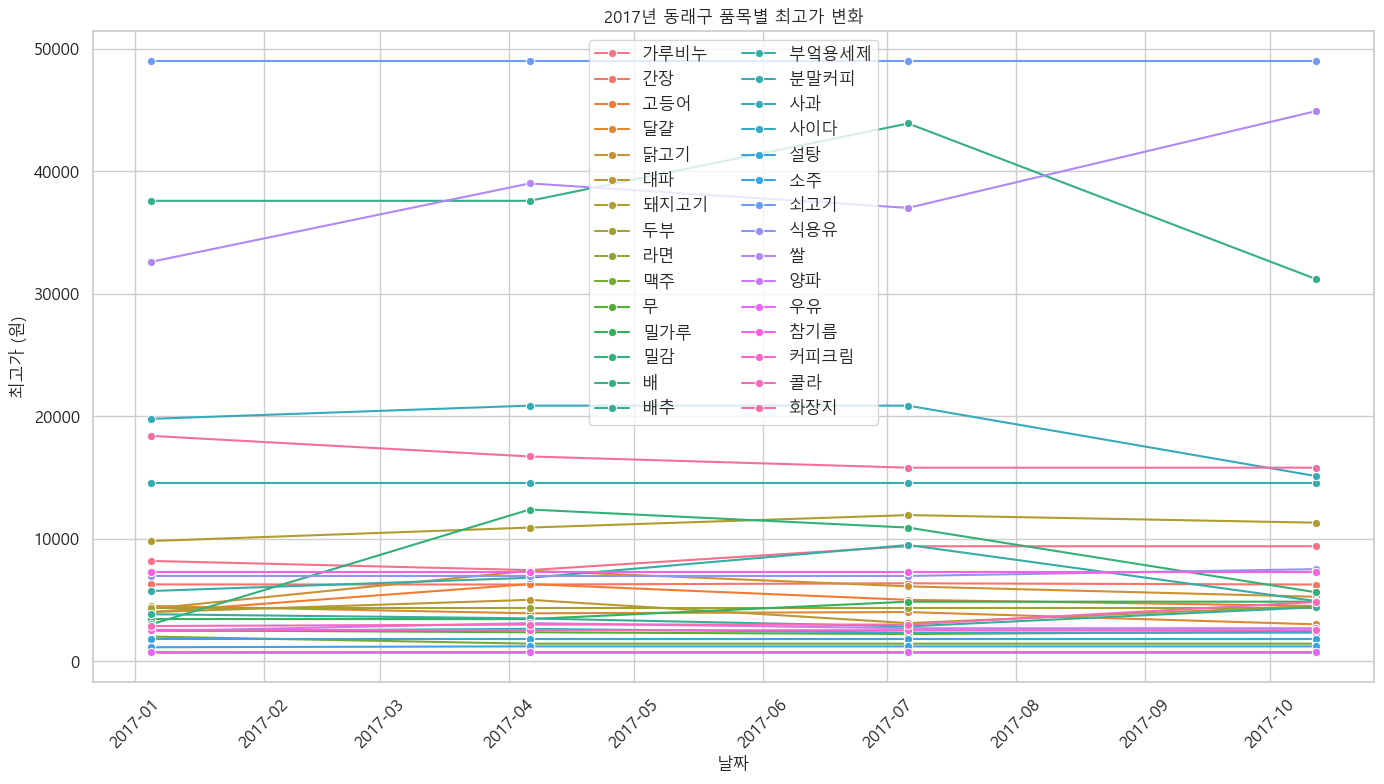

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎèôÎûòÍµ¨2017_1q.csv")
q2 = pd.read_csv("ÎèôÎûòÍµ¨2017_2q.csv")
q3 = pd.read_csv("ÎèôÎûòÍµ¨2017_3q.csv")
q4 = pd.read_csv("ÎèôÎûòÍµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ ÎèôÎûòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎèôÎûòÍµ¨2017_max.csv", index=False, encoding="utf-8-sig")